In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
## BRISE UPOZORENJA
import warnings
warnings.filterwarnings('ignore')

In [3]:
## UČITAVANJE TRAIN I TEST SKUPA

X_train = pd.read_hdf('X_train_proba.h5' , key = 'X_train')
X_test = pd.read_hdf('X_test_proba.h5', key = 'X_test')
y_train = X_train['PRIJEVREMENI_RASKID'].ravel()
X_train.drop(['PRIJEVREMENI_RASKID'], axis = 1, inplace = True)

## to je normalizirani skup, spreman za treniranje

[0.08615676 0.08900177 0.08596444 0.08678656 0.13413523 0.35960042
 0.00170559 0.00245547 0.00273341 0.00596537 0.0033093  0.00198569
 0.00225637 0.00222838 0.00447211 0.00233935 0.00679525 0.00252065
 0.01586547 0.01910726 0.01397072 0.04670546 0.00325823 0.02068075]


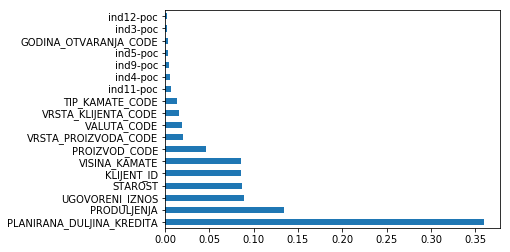

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X_train
y = y_train  #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [5]:
X_train_no_id = X_train.drop(['KLIJENT_ID'], axis = 1)

In [6]:
X_test_no_id = X_test.drop(['KLIJENT_ID'], axis = 1)

[0.1038393  0.10590028 0.10485171 0.13720884 0.38254791 0.00196897
 0.00359501 0.00606587 0.0056929  0.00351664 0.00256135 0.00330914
 0.00856149 0.00268507 0.00312357 0.00510125 0.00256901 0.01485771
 0.01890129 0.01392154 0.04471063 0.00492603 0.01958449]


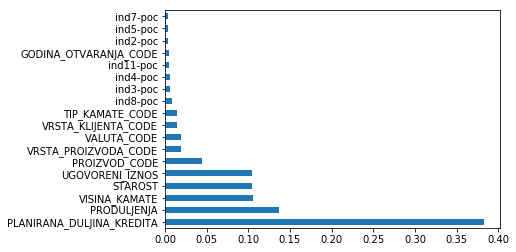

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = X_train_no_id
y = y_train #target column i.e price range


from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [9]:
ft_num = X_train.shape[1]
print(ft_num)

24


In [10]:
X.columns

Index(['UGOVORENI_IZNOS', 'VISINA_KAMATE', 'STAROST', 'PRODULJENJA',
       'PLANIRANA_DULJINA_KREDITA', 'ind1-poc', 'ind2-poc', 'ind3-poc',
       'ind4-poc', 'ind5-poc', 'ind6-poc', 'ind7-poc', 'ind8-poc', 'ind9-poc',
       'ind10-poc', 'ind11-poc', 'ind12-poc', 'VRSTA_KLIJENTA_CODE',
       'VALUTA_CODE', 'TIP_KAMATE_CODE', 'PROIZVOD_CODE',
       'GODINA_OTVARANJA_CODE', 'VRSTA_PROIZVODA_CODE'],
      dtype='object')

In [24]:
features1 = ['PLANIRANA_DULJINA_KREDITA', 'PRODULJENJA', 'VISINA_KAMATE', 'STAROST', 'KLIJENT_ID', 'UGOVORENI_IZNOS',
            'VALUTA_CODE', 'PROIZVOD_CODE', 'VRSTA_PROIZVODA_CODE', 'VRSTA_KLIJENTA_CODE', 'TIP_KAMATE_CODE', 'ind8-poc', 'ind3-poc', 'ind4-poc']

features2 = ['PLANIRANA_DULJINA_KREDITA', 'PRODULJENJA', 'KLIJENT_ID', 'UGOVORENI_IZNOS', 'STAROST', 'VISINA_KAMATE',
            'VALUTA_CODE', 'PROIZVOD_CODE', 'VRSTA_PROIZVODA_CODE', 'VRSTA_KLIJENTA_CODE', 'TIP_KAMATE_CODE', 'ind4-poc', 'ind11-poc']

In [12]:
X = X_train.copy()
X['PRIJEVREMENI_RASKID'] = y_train

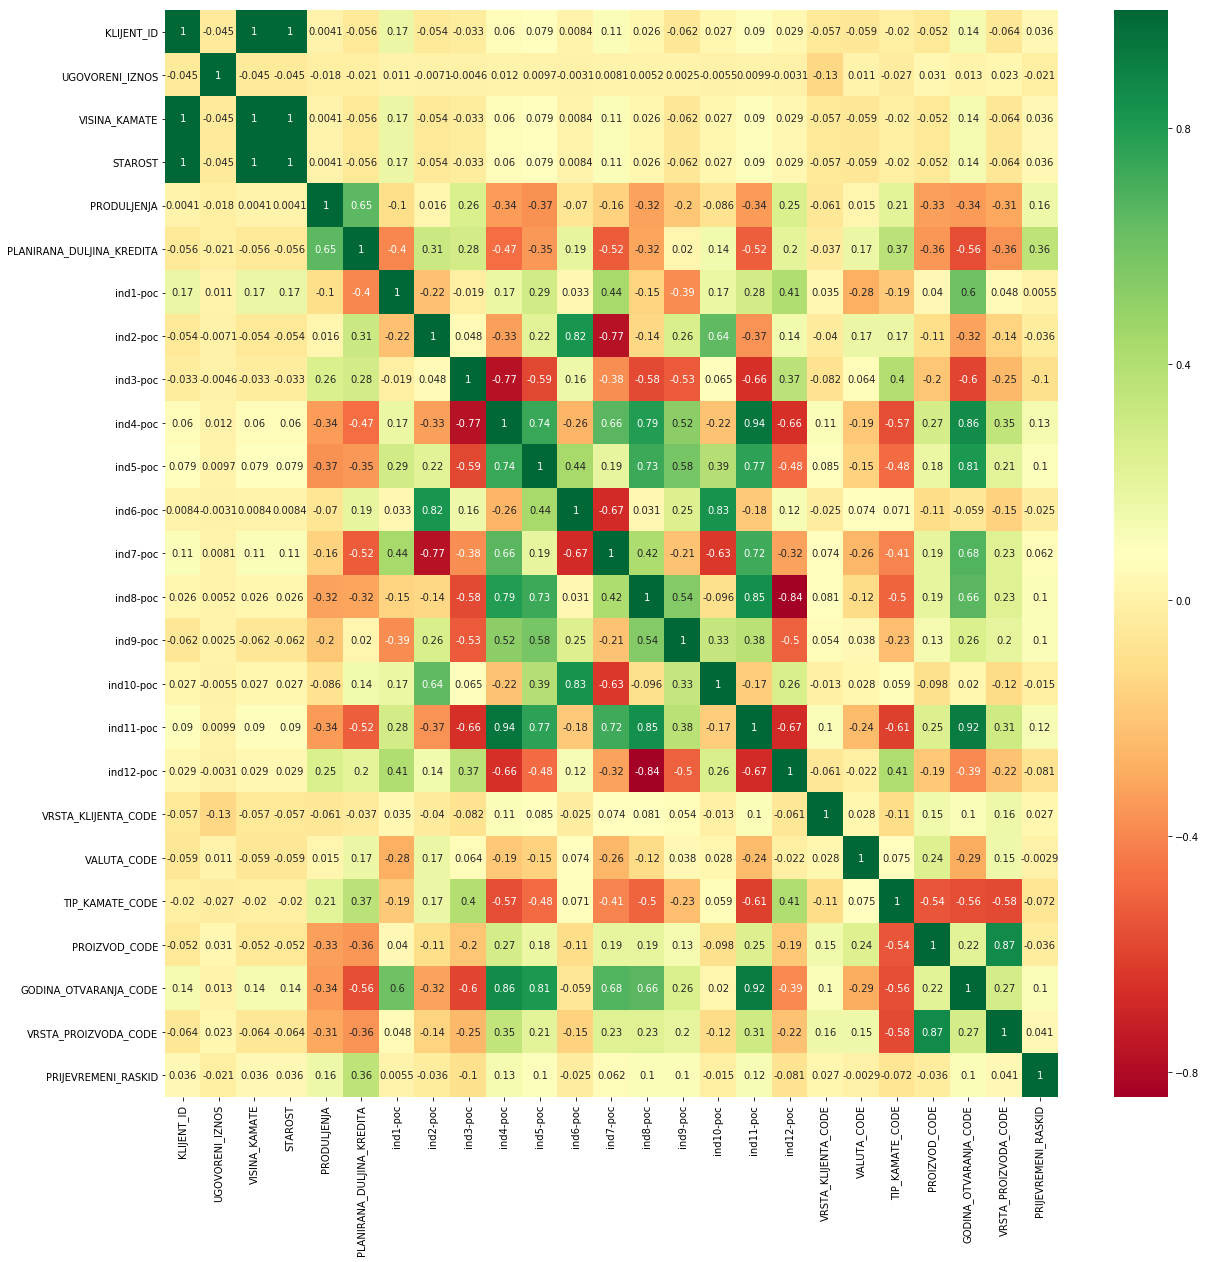

In [13]:
import seaborn as sns
#get correlations of each features in dataset
data = X
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
X_train_out1 = X_train[features1]
X_train_out1['PRIJEVREMENI_RASKID'] = y_train

X_train_out2 = X_train[features2]
X_train_out2['PRIJEVREMENI_RASKID'] = y_train

In [26]:
X_test_out1 = X_test[features1]
X_test_out2 = X_test[features2]

In [27]:
X_train_out1.to_hdf('X_train_ft1.h5', key= 'X_train_ft1')
X_train_out2.to_hdf('X_train_ft2.h5', key= 'X_train_ft2')

In [28]:
X_test_out1.to_hdf('X_test_ft1.h5', key= 'X_test_ft1')
X_test_out2.to_hdf('X_test_ft2.h5', key= 'X_test_ft2')